In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_b.csv', sep=';', header = None)
df.columns = ['id', 'date']
df.head(2)

,id,date
0,144,01.08.2022 15:00:30
1,144,01.08.2022 15:00:45


In [26]:
# date format is
# '01.08.2022 15:00:30'
#
# Convert data column to datetime
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.iloc()[0].date

Timestamp('2022-01-08 15:00:30')

In [28]:
# calculate seconds bween current and pervious date
# if id the same
for idx, row in df.iterrows():
    if idx == 0:
        df.loc[idx, 'seconds'] = np.NAN
    elif row['id'] == df.loc[idx-1, 'id']:
        # df.loc[idx, 'seconds'] = (row['date'] - df.loc[idx-1, 'date']).seconds
        df.loc[idx, 'seconds'] = (row['date'] - df.loc[idx-1, 'date']).total_seconds()
    else:
        df.loc[idx, 'seconds'] = np.NAN

In [30]:
df.head(2)

,id,date,seconds
0,144,2022-01-08 15:00:30,NaN
1,144,2022-01-08 15:00:45,15.0


In [31]:
df = df.dropna()
df.head(10)

,id,date,seconds
1,144,2022-01-08 15:00:45,15.0
2,144,2022-01-08 15:01:02,17.0
3,144,2022-01-08 15:01:18,16.0
4,144,2022-01-08 15:01:56,38.0
5,144,2022-01-08 15:02:31,35.0
6,144,2022-01-08 15:02:51,20.0
7,144,2022-01-08 15:03:14,23.0
8,144,2022-01-08 15:03:23,9.0
9,144,2022-01-08 15:03:31,8.0
10,144,2022-01-08 15:03:39,8.0


<AxesSubplot:xlabel='seconds', ylabel='id'>

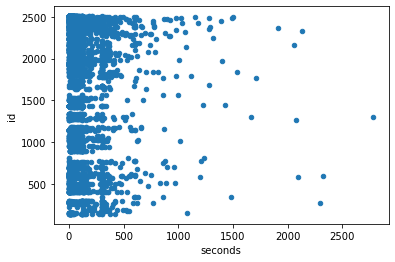

In [32]:
df.plot(x='seconds', y='id', kind='scatter')

<AxesSubplot:xlabel='seconds', ylabel='id'>

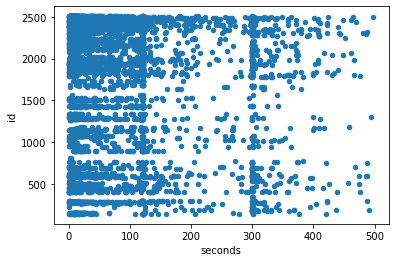

In [34]:
df[df.seconds<500].plot(x='seconds', y='id', kind='scatter')

<AxesSubplot:xlabel='seconds', ylabel='id'>

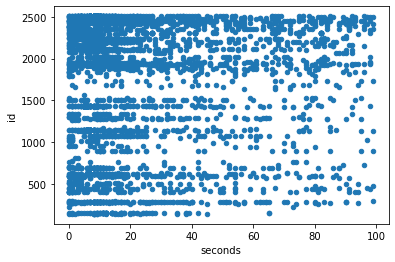

In [35]:
df[df.seconds<100].plot(x='seconds', y='id', kind='scatter')

<AxesSubplot:xlabel='seconds', ylabel='id'>

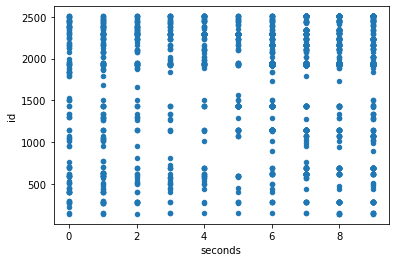

In [36]:
df[df.seconds<10].plot(x='seconds', y='id', kind='scatter')

In [37]:
df.id

1        144
2        144
3        144
4        144
5        144
        ... 
7535    2506
7536    2506
7537    2506
7538    2506
7539    2506
Name: id, Length: 7330, dtype: int64